# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
import pandas as pd
import numpy as np

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [5]:
print(f'Data shape:\t{diabetes.data.shape}\nData target:\t{diabetes.target.shape}')

Data shape:	(442, 10)
Data target:	(442,)


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [6]:
from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [7]:
diabetes_model = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [8]:
from sklearn.model_selection import train_test_split

diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes.data, diabetes.target, test_size=.2)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [9]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

print(f'Intercept:\t{diabetes_model.intercept_}\nCoefficients:\t{diabetes_model.coef_}')

Intercept:	155.16184000986706
Coefficients:	[  25.03986028 -239.00050547  540.95022985  320.76138105 -992.60728774
  634.39190776  143.69475485  192.3824093   800.25928924  117.74834052]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [10]:
y_predict = diabetes_model.predict(diabetes_data_test)
y_predict

array([ 81.93698804, 198.27403087, 214.8607298 , 260.43332266,
       158.50049486, 250.65509908, 100.37515435, 189.98198748,
       190.13173304, 127.90573986, 173.3119108 ,  99.28627471,
        51.87523743, 258.73891846, 161.82999631,  88.54682267,
       234.73493469, 235.85284291, 184.19940796, 234.87306139,
       185.5116233 , 106.79750043,  46.94830123,  97.09155503,
       187.58023838, 208.53651473, 134.62953324,  85.64289108,
       207.91242648, 144.34182772, 120.11458577, 165.7948606 ,
       194.94787383, 186.73809992, 229.8902735 , 127.10905075,
       121.47194569, 109.5672865 , 214.98370143, 166.02535195,
       163.85186746, 145.59269947, 293.10814431, 117.87022895,
       128.454703  , 170.03683382, 179.50959114, 122.52119754,
       120.67398068, 233.25634926, 199.22782892, 154.14679551,
       180.25094927, 148.35257855, 183.60871423, 118.22620748,
       169.01841581, 177.08576725,  49.54659157, 129.67103953,
       140.1752375 ,  73.03402847, 164.92045577, 164.76

#### Print your `diabetes_target_test` and compare with the prediction. 

In [11]:
diabetes_target_test

array([ 53., 170., 249., 233., 113., 132.,  97., 229.,  67., 132., 235.,
       158.,  99., 277., 100., 115., 155., 217.,  84., 128.,  85., 142.,
        47., 125., 144., 265.,  74.,  87., 265., 185., 199., 185.,  78.,
       283., 180.,  53., 144., 102., 150.,  94., 237., 116., 281.,  88.,
        84.,  58., 139.,  63., 214., 257., 129., 136.,  77.,  95., 107.,
        78., 151., 147.,  90., 145., 190.,  51., 131., 156., 138., 220.,
        48., 129., 200.,  64.,  70., 219., 168.,  60., 246., 306., 248.,
       230.,  40., 122.,  63., 141.,  52., 214.,  73., 206.,  72., 182.,
       111.])

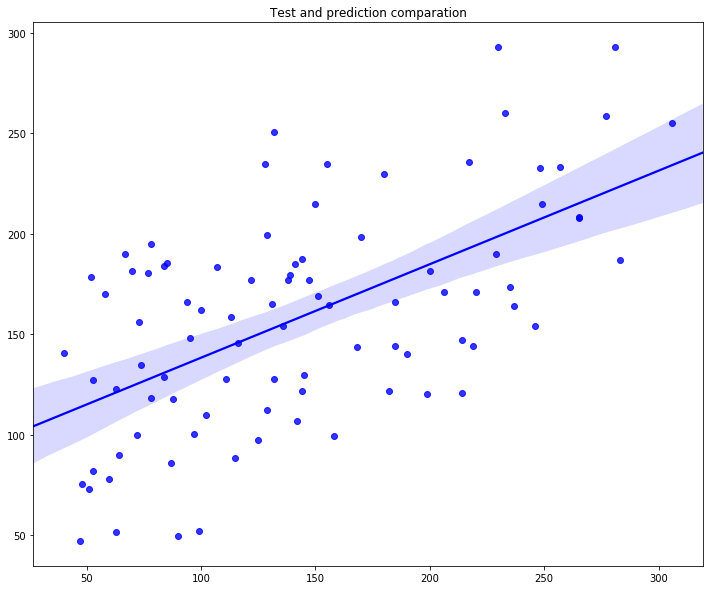

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,10)
sns.regplot(diabetes_target_test,y_predict,color='b')
plt.title('Test and prediction comparation')
plt.show()

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [13]:
print(diabetes_model.score(diabetes_data_train,diabetes_target_train)) #X_train, y_train
print(diabetes_model.score(diabetes_data_test,diabetes_target_test)) #X_test,y_test

0.5598574474502849
0.259011999832674


**Your explanation here:**
No. Hay variaciones de más del 50%. El nivel de predicción es bajo, probablemente porque el modelo escogido no se ajusta a los datos.

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../statsmodels.png)

In [14]:
import statsmodels.api as sm
from statsmodels.api import OLS

model = sm.OLS(diabetes_target_train, diabetes_data_train) # y:= diabetes_target_train; X:= diabetes_data_train
pred = model.fit()
print(pred.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.083
Method:                 Least Squares   F-statistic:                              4.184
Date:                Sun, 25 Aug 2019   Prob (F-statistic):                    1.74e-05
Time:                        21:16:05   Log-Likelihood:                         -2300.3
No. Observations:                 353   AIC:                                      4621.
Df Residuals:                     343   BIC:                                      4659.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [15]:
auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [16]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [17]:
auto.info()

#all of them are numbers; 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horse_power     392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [18]:
# Maybe we can convert 'car_name' into a dummie set, but it will be 305 new variables
pd.get_dummies(auto.car_name).sum(axis=0).sort_values(ascending=False)

\t"ford pinto"                           6
\t"ford maverick"                        5
\t"amc matador"                          5
\t"toyota corolla"                       5
\t"chevrolet chevette"                   4
\t"chevrolet impala"                     4
\t"toyota corona"                        4
\t"amc gremlin"                          4
\t"peugeot 504"                          4
\t"amc hornet"                           4
\t"chevrolet vega"                       3
\t"chevrolet citation"                   3
\t"dodge colt"                           3
\t"volkswagen dasher"                    3
\t"chevrolet nova"                       3
\t"plymouth fury iii"                    3
\t"plymouth duster"                      3
\t"chevrolet caprice classic"            3
\t"honda civic"                          3
\t"ford gran torino"                     3
\t"ford galaxie 500"                     3
\t"pontiac catalina"                     3
\t"pontiac phoenix"                      2
\t"chevrole

What is the newest model year and the oldest model year?

In [19]:
auto.model_year.min(), auto.model_year.max()

(70, 82)

Check the dataset for missing values and remove all rows containing at least one missing value.

In [20]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [21]:
len(auto)

398

In [22]:
#Droping horse_power as nan value, because it has no physical sense
auto[auto.isnull().any(axis=1)]
auto.dropna(inplace=True)

In [23]:
len(auto) #6 rows dropped

392

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [24]:
auto.cylinders.value_counts()


4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [25]:
# X definition
X = auto.drop(columns=['car_name','mpg'])
X.head()

,cylinders,displacement,horse_power,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [26]:
# y definition
y=auto.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [28]:
from sklearn.linear_model import LinearRegression              # Regresor lineal

auto_model = linear_model.LinearRegression()

auto_model.fit(X_train,y_train) #fit the model with the trained data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [29]:
from sklearn.metrics import r2_score
y_pred = auto_model.predict(X_train) #predicting y based on X_train

r2_score(y_train, y_pred)

0.8062034420632727

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [30]:
y_test_pred = auto_model.predict(X_test) #predicting y based on X_test

r2_score(y_test,y_test_pred)

0.8157329337452772

#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [31]:
X_train09, X_test09, y_train09, y_test09 = train_test_split(X,y,train_size=.9)

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [32]:
auto_model09 = linear_model.LinearRegression()

In [33]:
auto_model09.fit(X_train09,y_train09)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Compute the predicted values and r squared score for our new model and new sample data.

In [34]:
y_pred09 = auto_model09.predict(X_train09)

r2_score(y_train09,y_pred09)

0.8133529467131326

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [35]:
y_test_pred09 = auto_model09.predict(X_test09)

r2_score(y_test09,y_test_pred09)

0.770975002289647

In [36]:
#Is there an improvement in the test r squared?
# In terms of the test part:
print(f'The increased sample size of 90% with an r2 of {r2_score(y_test09,y_test_pred09)} seems NOT better than the first model that has a good r2 of {r2_score(y_test,y_test_pred)}')
print('But in terms of training the data, it is indeed much better the model with an increased sample size.')

The increased sample size of 90% with an r2 of 0.770975002289647 seems NOT better than the first model that has a good r2 of 0.8157329337452772
But in terms of training the data, it is indeed much better the model with an increased sample size.


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [37]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [38]:
# auto_model = linear_model.LinearRegression() #toma de la regresión lineal

rfe = RFE(auto_model, n_features_to_select=3) #verbose =3

Fit the model and print the ranking

In [39]:
X.columns

Index(['cylinders', 'displacement', 'horse_power', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [40]:
rfe.fit(X_train,y_train)
rfe.ranking_

# so, calificó con 1 a:= cylinders, acceleration, model_year
# 2:= displacement
#4:= horse_power
#3:= weight

array([1, 2, 4, 3, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [41]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(auto[['cylinders','acceleration','model_year']],auto['mpg'],train_size=.8)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [42]:
auto_model_reduced = linear_model.LinearRegression()

auto_model_reduced.fit(X_train_reduced,y_train_reduced)

y_pred_reduced = auto_model_reduced.predict(X_train_reduced)

r2_score(y_train_reduced, y_pred_reduced)

0.7263250845208427

In [43]:
print(f'R2 Score (train model with all features):\t{round(r2_score(y_train, y_pred),3)}\nR2 Score (train model features reduced):\t{round(r2_score(y_train_reduced, y_pred_reduced),3)}')

R2 Score (train model with all features):	0.806
R2 Score (train model features reduced):	0.726


In [44]:
# Evaluating this model using the test data

y_test_pred_reduced = auto_model_reduced.predict(X_test_reduced)

r2_score(y_test_reduced, y_test_pred_reduced)

0.6542582522732994

In [45]:
print(f'R2 Score (test model with all features):\t{round(r2_score(y_test,y_test_pred),3)}\nR2 Score (test model features reduced):\t{round(r2_score(y_test_reduced, y_test_pred_reduced),3)}')

R2 Score (test model with all features):	0.816
R2 Score (test model features reduced):	0.654


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.